In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import SimpleRNN , Input,Flatten, LSTM
from tensorflow.keras import backend as K
from keras import initializers
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
opened = []

csv_path = '/global/scratch/users/arvalcarcel/CSMUB/RESULTS/CSV/'

masterlist = '/global/scratch/users/arvalcarcel/CSMUB/RESULTS/ALL_STATIONS_FINAL_REVISED.csv'

stations_df = pd.read_csv(masterlist)
station_num = stations_df['grdc_no']

arrayFile = [os.path.join(csv_path, f"{station_no}.csv") for station_no in station_num]

for file in arrayFile:
  df = pd.read_csv(file, index_col= None, header = 0)
  opened.append(df)

total_df = pd.concat(opened, axis = 0, ignore_index = True)

q = total_df['Q']
print(min(q),max(q))
swe = total_df['SWE']
scaled = total_df['SWE_scaled']/100
print(min(scaled),max(scaled))

0.0 259209.349
0.0 428837.68444948917


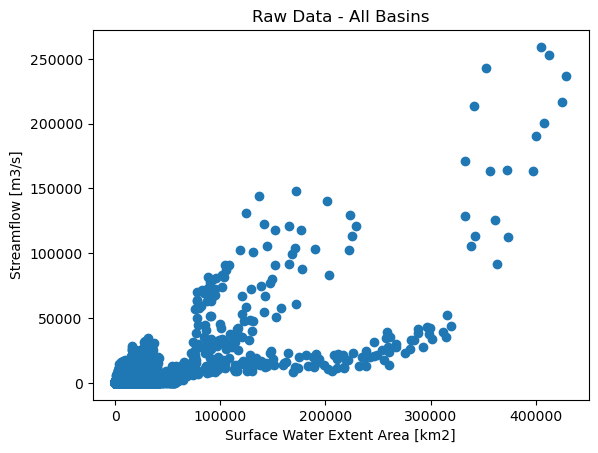

In [3]:
plt.scatter(scaled,q)
plt.title('Raw Data - All Basins')
plt.xlabel('Surface Water Extent Area [km2]')
plt.ylabel('Streamflow [m3/s]')
plt.show()

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

# Convert q and swe to NumPy arrays
X = scaled.to_numpy()  # This will be 1D: shape (num_samples,)
y = q.to_numpy()

# Assume X and y are your 1D time series arrays
# Step 1: Replace zeros with a small value
X[X == 0] = 1e-9
y[y == 0] = 1e-9

# Step 2: Reshape data (if needed)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Step 3: Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [5]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [16]:
# model = Sequential([
#     Dense(256, input_dim=1, activation='tanh'),
#     Dense(128, activation='elu'),
#     Dense(64, activation='relu'),
#     # LeakyReLU(alpha=0.01),
#     Dense(32, activation='relu'),
#     Dense(1, activation='linear')])

# model.compile(optimizer=Adam(learning_rate=1e-3), 
#           loss='mean_squared_error',
#           metrics=['mae','accuracy'])

# history = model.fit(X_train, y_train, epochs=500, 
#             batch_size=512, validation_data=(X_test, y_test), 
#             verbose=1)

model = Sequential([
    Dense(256, input_dim=1, activation='tanh'),
    Dense(128, activation='elu'),
    Dense(64, activation='relu'),
    Dense(32, activation=LeakyReLU(alpha=0.01)),  # LeakyReLU layer
    Dense(1, activation='linear')                # Output layer
])

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='mean_squared_error',
              metrics=['mae','accuracy'])



Epoch 1/500


/global/home/users/arvalcarcel/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0641 - loss: 3.9441e-04 - mae: 0.0061 - val_accuracy: 0.0772 - val_loss: 3.6104e-04 - val_mae: 0.0041
Epoch 2/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0644 - loss: 3.7160e-04 - mae: 0.0039 - val_accuracy: 0.0774 - val_loss: 3.9968e-04 - val_mae: 0.0048
Epoch 3/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0657 - loss: 3.9803e-04 - mae: 0.0040 - val_accuracy: 0.0772 - val_loss: 3.5101e-04 - val_mae: 0.0036
Epoch 4/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0654 - loss: 3.4477e-04 - mae: 0.0035 - val_accuracy: 0.0772 - val_loss: 3.5104e-04 - val_mae: 0.0032
Epoch 5/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0674 - loss: 4.2489e-04 - mae: 0.0043 - val_accuracy: 0.0772 - val_loss: 4.1329e-04 - val_mae: 0.0057
Epoch 6/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0667 - loss: 4.5179e-04 - mae: 0.0050 - val_accuracy: 0.0772 - val_loss: 3.3417e-04 - val_mae: 0.0035
Epoch 7/50

In [7]:
# Step 7: Evaluate
test_loss = model.evaluate(X_test, y_test)
print(f"Test MAPE: {test_loss}")

# Step 8: Predict
predictions = model.predict(X_test)
y_pred = scaler_y.inverse_transform(predictions)

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0746 - loss: 3.0166e-04 - mae: 0.0054
Test MAPE: [0.00023518690431956202, 0.005146929528564215, 0.07740676403045654]
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


Mean Squared Error (MSE): 50012916.38239883


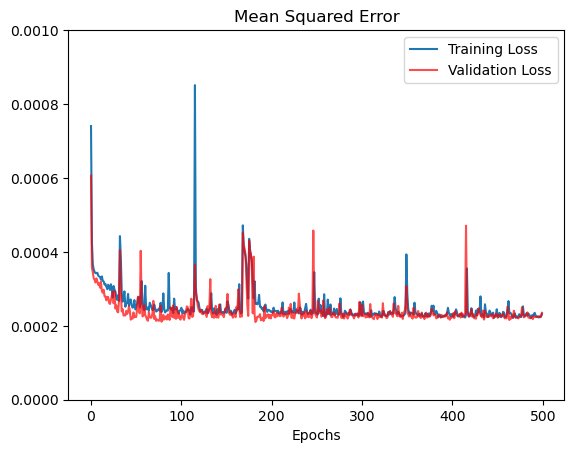

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Compute MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# print((max(y_train) - min(y_train))**2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss',color='r',alpha=0.7)
plt.xlabel('Epochs')
plt.title('Mean Squared Error')
plt.ylim(0, 0.001)
plt.legend()
plt.show()


In [9]:
# plt.plot(history.history['accuracy'],'b')
# plt.plot(history.history['val_accuracy'],'r')
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# Make predictions on the validation set
# y_pred = FNN.predict(X_val)
# print(y_pred.size)
# print(X_val.size)
# # Compare predictions with actual values
# plt.plot(y_pred, alpha=0.5)
# plt.title('Predictions vs Actual Values')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.show()

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step


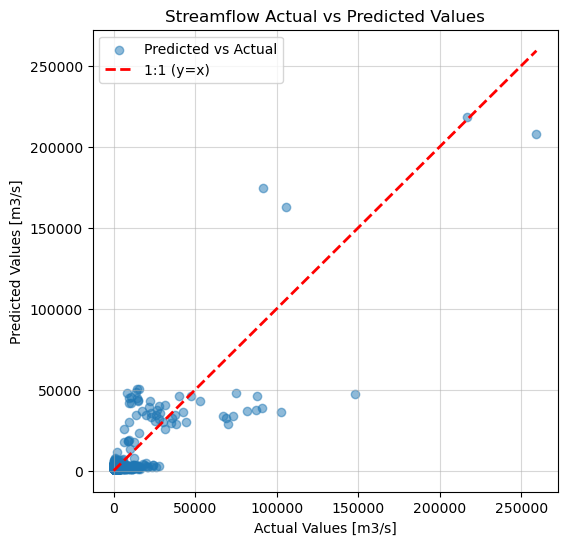

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Predict values
y_pred = model.predict(X_test)

# Step 2: Create the scatter plot
plt.figure(figsize=(6,6))
plt.scatter(y_test*max(y), y_pred*max(y), alpha=0.5, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='1:1 (y=x)', linewidth=2)

# Step 3: Add labels, title, and legend
plt.title("Streamflow Actual vs Predicted Values")
plt.xlabel("Actual Values [m3/s]")
plt.ylabel("Predicted Values [m3/s]")
plt.legend()
plt.grid(alpha=0.5)

# Step 4: Show the plot
plt.show()


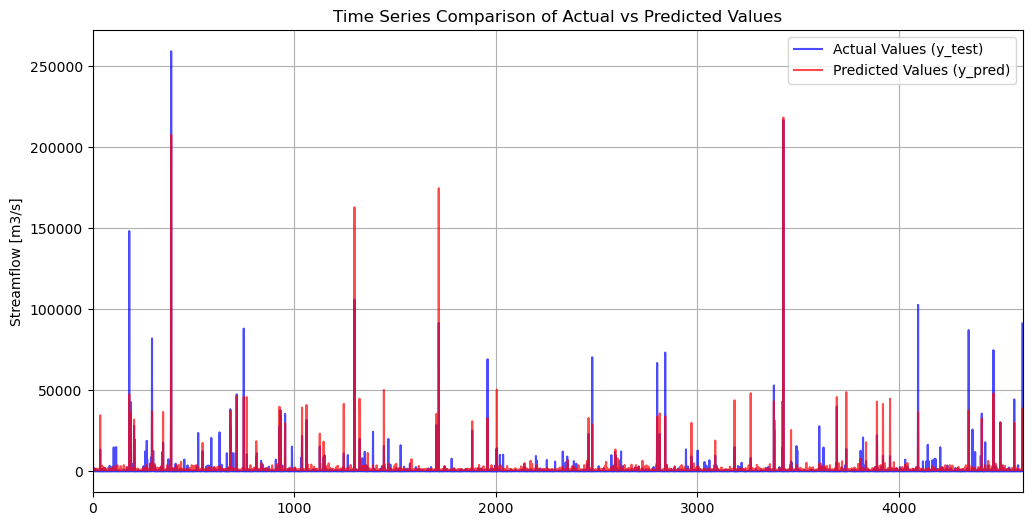

In [11]:
# Plot y_test and y_pred as a time series
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test)), y_test*max(y), label="Actual Values (y_test)", color="blue", alpha=0.7)
plt.plot(np.arange(len(y_pred)), y_pred*max(y), label="Predicted Values (y_pred)", color="red", alpha=0.7)

# error = y_test + 0.0033

# fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
# ax0.errorbar(x, y, yerr=error)
# 0.0033 
# Add titles and labels
plt.title("Time Series Comparison of Actual vs Predicted Values")
# plt.xlabel("Time Step")
plt.ylabel("Streamflow [m3/s]")
plt.xlim(0,len(y_test))
plt.legend()
plt.grid(True)
plt.show()

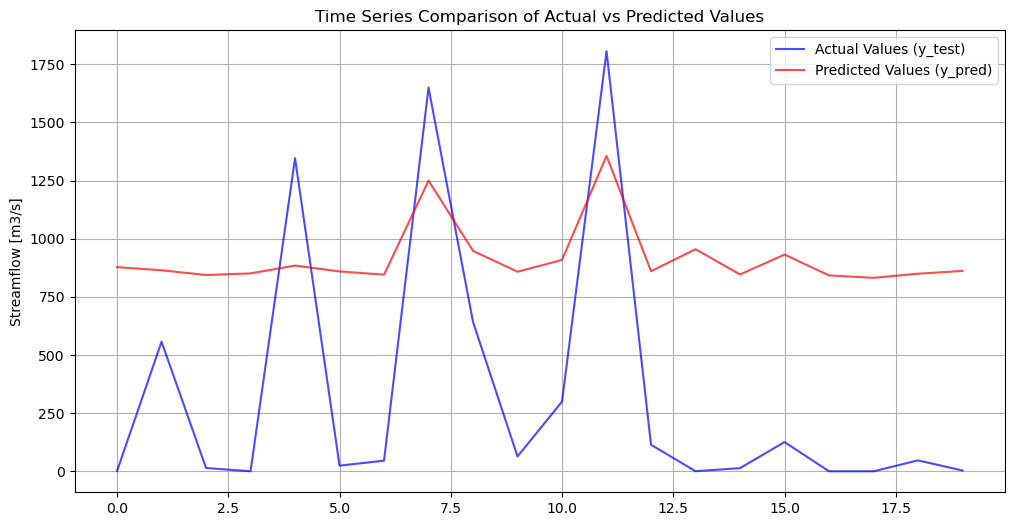

In [12]:
# Plot y_test and y_pred as a time series
plt.figure(figsize=(12, 6))
plt.plot((np.arange(len(y_test)))[0:20], (y_test*max(y))[0:20], label="Actual Values (y_test)", color="blue", alpha=0.7)
plt.plot((np.arange(len(y_pred)))[0:20], (y_pred*max(y))[0:20], label="Predicted Values (y_pred)", color="red", alpha=0.7)

# error = y_test + 0.0033

# fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
# ax0.errorbar(x, y, yerr=error)
# 0.0033 
# Add titles and labels
plt.title("Time Series Comparison of Actual vs Predicted Values")
# plt.xlabel("Time Step")
plt.ylabel("Streamflow [m3/s]")
# plt.xlim(0,len(y_test))
plt.legend()
plt.grid(True)
plt.show()

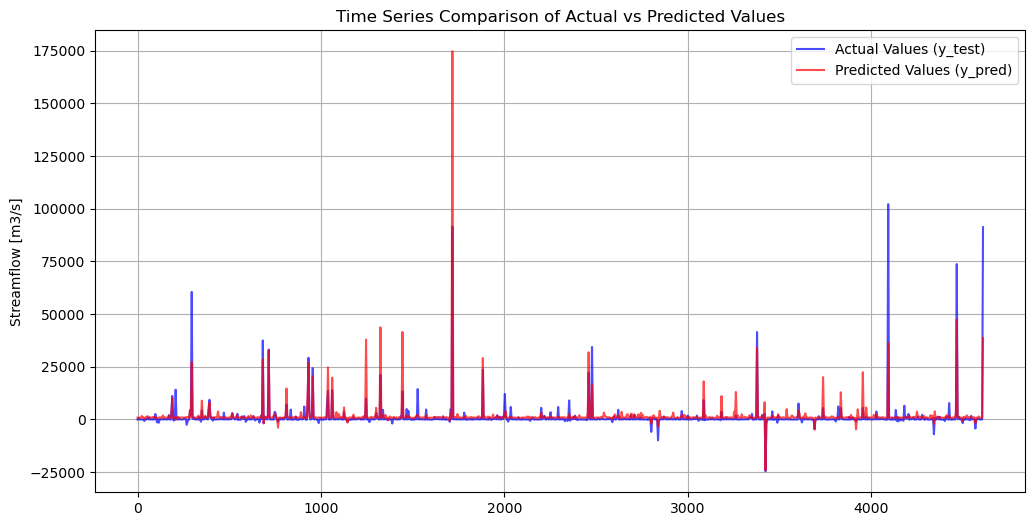

In [13]:
from scipy.interpolate import make_interp_spline

xnew_test = np.arange(len(y_test))
ynew_test = y_test*max(y)
xnew_pred = np.arange(len(y_pred))
ynew_pred = y_pred*max(y)
X_Y_Spline_Test = make_interp_spline(xnew_test, ynew_test)
X_Y_Spline_Pred = make_interp_spline(xnew_pred, ynew_pred)
# Returns evenly spaced numbers
# over a specified interval.
X_1 = np.linspace(0, xnew_test.max(), 1000)
Y_1 = X_Y_Spline_Test(X_1)
X_2 = np.linspace(0, xnew_pred.max(), 1000)
Y_2 = X_Y_Spline_Pred(X_2)

# Plot y_test and y_pred as a time series
plt.figure(figsize=(12, 6))
plt.plot(X_1,Y_1, label="Actual Values (y_test)", color="blue", alpha=0.7)
plt.plot(X_2,Y_2, label="Predicted Values (y_pred)", color="red", alpha=0.7)


# Add titles and labels
plt.title("Time Series Comparison of Actual vs Predicted Values")
# plt.xlabel("Time Step")
plt.ylabel("Streamflow [m3/s]")
# plt.xlim(0,len(y_test))
plt.legend()
plt.grid(True)
plt.show()

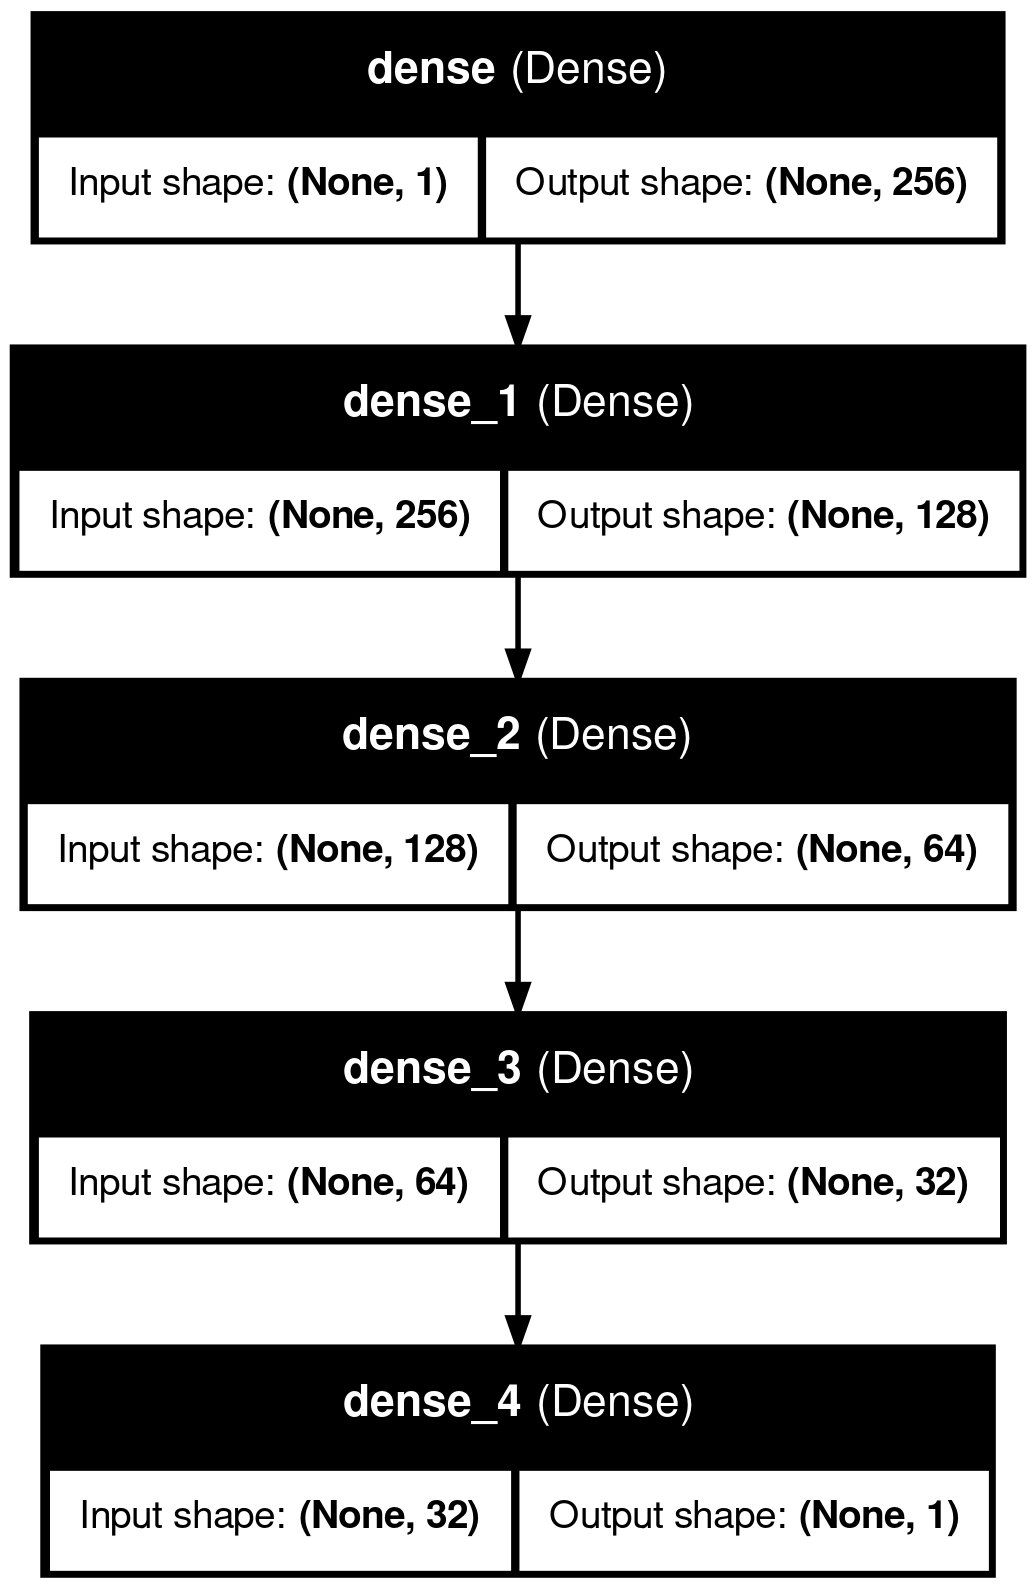

In [14]:
filename = '/global/scratch/users/arvalcarcel/CSMUB/RESULTS/CNN/rnn_plot.png'
# Ensure the directory exists
os.makedirs(os.path.dirname(filename), exist_ok=True)
from tensorflow.keras.utils import plot_model

# Plot and save the model
plot_model(model, to_file=filename, show_shapes=True, show_layer_names=True)

from IPython.display import Image
Image(filename)

In [15]:
# import matplotlib.pyplot as plt
# import networkx as nx

# def plot_ffnn(layers):
#     """
#     Plot a simple FFNN structure using Matplotlib.
#     :param layers: List of integers representing the number of neurons in each layer.
#     """
#     G = nx.DiGraph()
#     pos = {}
#     x_offset = 0
    
#     # Build nodes and edges for layers
#     for i, num_neurons in enumerate(layers):
#         y_positions = range(num_neurons)
#         pos.update({(i, j): (x_offset, -y) for j, y in enumerate(y_positions)})
#         x_offset += 1
    
#         # Connect to previous layer
#         if i > 0:
#             for j in range(layers[i-1]):
#                 for k in range(num_neurons):
#                     G.add_edge((i-1, j), (i, k))
    
#     # Draw the graph
#     plt.figure(figsize=(12, 6))
#     nx.draw(G, pos, with_labels=False, node_size=500, node_color="black", edge_color="gray")
#     plt.title("Feed-Forward Neural Network")
#     plt.axis("off")
#     plt.show()


# # model = Sequential([
# #     Dense(256, input_dim=1, activation='relu'),
# #     Dense(128, activation='relu'),
# #     Dense(64, activation='tanh'),
# #     Dense(32, activation='relu'),
# #     Dense(1, activation='linear')  # Output layer
# # ])

# # Example: FFNN with 3 layers: 4 neurons → 6 neurons → 2 neurons
# plot_ffnn([8,6,4,2,1])
